<a href="https://colab.research.google.com/github/Olivine-Ryo/ai-art/blob/main/Let's_enjoy_Stable_Diffusion!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusionに呪文を入力してあなたの好きな画像を生成しよう

日経電子版ビジュアルデータのコンテンツ「[AIが描く絵 見分けられる？ 画像生成 AI はノイズから絵を描く
](https://vdata.nikkei.com/newsgraphics/ai-art/)」では、擬似体験としてあらかじめAIが生成した画像を表示していました。このノートブックでは実際にあなたの好きな呪文を入力してStable Diffusionに画像を生成させることができます。

## 📖 ノートブックを実行する前に読んでください / README

- GPUランタイムを使用する必要があります。上のメニューバーから「ランタイム」→「ランタイムのタイプを変更」で、ハードウェアアクセラレータをGPUに設定してください。

- 上から順に、コードを実行していきます。左に▶ボタンがあるところ（これをセルと呼ぶ）を、順に押していきます。▶ボタンを押し、その左側に✅が付いたら、次のボタンに移動してください。

- 画像生成は[The CreativeML OpenRAIL M license](https://github.com/CompVis/stable-diffusion/blob/main/LICENSE)のライセンスに従う必要があります。一部を下に抜粋します。

<details>
 <summary>使用上の制限(The CreativeML OpenRAIL M licenseの機械翻訳)</summary>
 
 お客様は、本モデルまたは本モデルの派生物を使用しないことに同意するものとします。
  - 適用される国、連邦、州、地方、または国際的な法律または規制に違反する方法での使用。
  - いかなる方法であれ、未成年者を搾取し、害し、または搾取もしくは害しようとする目的。
  - 他者を害する目的で、検証可能なほど虚偽の情報および/またはコンテンツを生成または広めること。
  - 個人を特定できる情報であって、他人に危害を加えることができるものを作成し、又は流布すること。
  - 他者を誹謗、中傷、その他嫌がらせをすること。
  - 個人の法的権利に悪影響を与える、または拘束力のある強制力のある義務を作成または変更する完全自動化された意思決定のため。
  - オンラインまたはオフラインの社会的行動、あるいは既知または予測される個人的または人格的特徴に基づき、個人またはグループを差別することを意図した、またはそのような効果を持つあらゆる使用。
  - 年齢、社会的、身体的または精神的特徴に基づく特定の集団の脆弱性を利用し、その集団に属する人の行動を、その人または他の人に身体的または精神的な損害を与えるか、与える可能性がある方法で著しく歪曲させるため。
  - 法的に保護された特性又はカテゴリーに基づく個人又はグループに対する差別を目的とする又はその効果を有するあらゆる用途のため。
  - 医学的なアドバイスや医学的な結果の解釈を提供するため。
  - 個人が詐欺や犯罪を犯すことを予測するなど、司法、法執行、移民または亡命プロセスの管理に使用する目的で情報を生成または広めるため（例：テキストプロファイリング、文書内の主張の因果関係を描く、無差別かつ任意に対象を絞った使用による）。
</details>

- 生成された画像の利用についてはユーザーが一切の責任を負います。

- 日本経済新聞社は本ノートブックを使用して発生したいかなる損失にも一切の責任を負いません。

初回実行時は↓のようなメッセージが出ます。

## 💨 必要なパッケージのインストール / Install packages

In [3]:
# @markdown ←の▶ボタンをクリックしてください。
%pip install sentencepiece diffusers[torch]==0.9 transformers ftfy spacy einops
!pip install -q https://github.com/metrolobo/xformers_wheels/releases/download/1d31a3ac_various_6/xformers-0.0.14.dev0-cp37-cp37m-linux_x86_64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 6.3 MB/s 
     |████████████████████████████████| 453 kB 68.6 MB/s 
     |████████████████████████████████| 5.8 MB 54.9 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 41 kB 513 kB/s 
     |████████████████████████████████| 182 kB 72.9 MB/s 
     |████████████████████████████████| 191 kB 75.2 MB/s 
     |████████████████████████████████| 7.6 MB 55.6 MB/s 
ERROR: xformers-0.0.14.dev0-cp37-cp37m-linux_x86_64.whl is not a supported wheel on this platform.


## 🤗 モデルの選択・ダウンロード / Select and download models

Hugging Faceにログインする。 / Login Hugging Face🤗

In [ ]:
# @markdown ←の▶を下を読んだ後にクリックしてください。<br> Stable Diffusionのみを使用する場合はスキップしてください。 Japanese Stable Diffusionを動かす場合は、モデルのライセンスに同意する必要があります。[こちらのモデルリンク](https://huggingface.co/rinna/japanese-stable-diffusion)にアクセスし、ライセンスを読み同意できる場合、チェックボックスにチェックを入れてください。Hugging Face Hubのアカウントがない方は、"Sign Up"ボタンから登録し、access tokenが必要になります。詳細は、[こちらのドキュメント](https://huggingface.co/docs/hub/security-tokens)を参考ください。
from huggingface_hub import notebook_login

!git config --global credential.helper store
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


画像生成に使うモデルを選択する。　/ Select a model to use for image generation

In [4]:
# @markdown ←の▶を下からモデルを選択した後にクリックしてください。<br>初回はHugging Faceからモデルをダウンロードするため、実行完了まで数分程度要します。
import glob
import os

import IPython
import torch
from diffusers import EulerDiscreteScheduler, StableDiffusionPipeline
from PIL import Image


class JapaneseTokenizer:
    def __init__(self, tokenizer):
        tokenizer.do_lower_case = True
        tokenizer.model_max_length = 77
        self.tokenizer = tokenizer
        self.model_max_length = tokenizer.model_max_length

    def __call__(self, text, **kwargs):
        add_special_tokens = kwargs.pop("add_special_tokens", False)
        return self.tokenizer(text, add_special_tokens=add_special_tokens, **kwargs)


d_model = {
    "Stable Diffusion v2.0": "stabilityai/stable-diffusion-2",
    "Stable Diffusion v1.4": "CompVis/stable-diffusion-v1-4",
    "Japanese Stable Diffusion": "rinna/japanese-stable-diffusion",
}
model_name = "Stable Diffusion v2.0"  # @param ["Stable Diffusion v2.0","Stable Diffusion v1.4","Japanese Stable Diffusion"]
pipe = StableDiffusionPipeline.from_pretrained(
    d_model[model_name],
    scheduler=EulerDiscreteScheduler.from_pretrained(
        d_model[model_name], subfolder="scheduler"
    ),
    torch_dtype=torch.float16,
    revision="fp16",
).to("cuda")

if model_name == "Japanese Stable Diffusion":
    pipe.tokenizer = JapaneseTokenizer(pipe.tokenizer)

pipe.enable_attention_slicing()


def callback(iter, t, latents):
    # adapted from https://discuss.huggingface.co/t/decoding-latents-to-rgb-without-upscaling/23204/7
    # this factors should be only for v1.4
    # but, as the results are not bad for v2.0 as well, we just use them.
    v1_4_rgb_latent_factors = torch.tensor(
        [
            #   R      G      B
            [0.298, 0.207, 0.208],  # L1
            [0.187, 0.286, 0.173],  # L2
            [-0.158, 0.189, 0.264],  # L3
            [-0.184, -0.271, -0.473],  # L4
        ],
        dtype=latents.dtype,
        device=latents.device,
    )

    if iter == 0:
        os.makedirs(f"{CFG.prompt}-{CFG.seed_idx}", exist_ok=True)
        os.makedirs(f"{CFG.prompt}-{CFG.seed_idx}/pixel/", exist_ok=True)
        os.makedirs(f"{CFG.prompt}-{CFG.seed_idx}/latent/", exist_ok=True)

    with torch.no_grad():
        latent_image = latents[0].permute(1, 2, 0) @ v1_4_rgb_latent_factors
        latents_ubyte = (((latent_image + 1) / 2).clamp(0, 1).mul(0xFF).byte()).cpu()
        latent_image_done = Image.fromarray(latents_ubyte.numpy())
        latent_image_done.save(
            f"{CFG.prompt}-{CFG.seed_idx}/latent/img_{CFG.seed_idx}_latent_iter_{str(iter).zfill(3)}.png"
        )

        latents_normalized = 1 / 0.18215 * latents
        image = pipe.vae.decode(latents_normalized).sample
        image = (image / 2 + 0.5).clamp(0, 1)
        image = image.cpu().permute(0, 2, 3, 1).float().numpy()
        image = pipe.numpy_to_pil(image)

        for i, img in enumerate(image):
            img.save(
                f"{CFG.prompt}-{CFG.seed_idx}/pixel/img_{CFG.seed_idx}_iter_{str(iter).zfill(3)}.png"
            )

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/815 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/900 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/602 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

## 🎨 画像生成 / Generate images!

生成したい画像を表現した言葉(呪文, プロンプト; promot)を入力しましょう。Stable Diffusionでは英語、Japanese Stable DIffusionでは日本語を入力してください。呪文に合わせてAIが画像を生成してくれます。  
生成された画像と生成過程の画像は左側のフォルダボタンをクリックすることで見ることができます。ノートブックを閉じると画像は消去されてしまうことに注意してください。

  0%|          | 0/20 [00:00<?, ?it/s]

入力したプロンプト :a photo of an astronaut riding a horse on mars


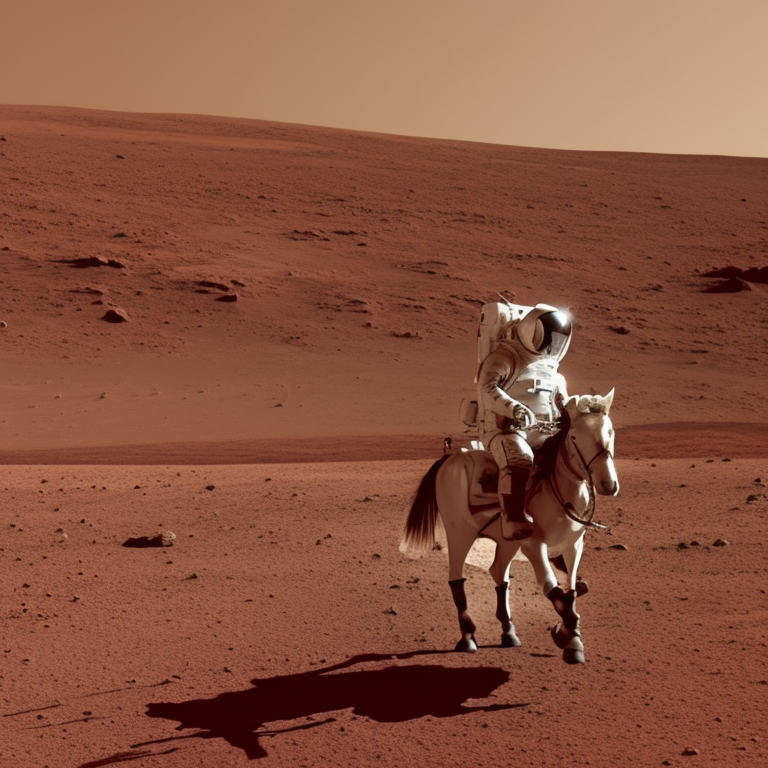

In [7]:
# @markdown ←の▶を下のパラメタの入力を終えた後にクリックしてください。
class CFG:
    prompt = "a photo of an astronaut riding a horse on mars"  # @param{type: "string"}
    # @markdown `prompt`には生成したい画像を表現した言葉を入力してください。Stable Diffusionは英語、Japanese Stable Diffusionは日本語で入力してください。
    height = 768  # @param{type: "integer"}
    # @markdown `height`で生成したい画像の高さ(px)を指定できます。
    width = 768  # @param{type: "integer"}
    # @markdown `width`は生成したい画像の幅(px)を指定できます。
    seed_idx = 2710067634  # @param{type: "integer"}

    # @markdown `seed_idx`を変えることで別の画像が生成されます。初期ランダムガウスノイズを生成する乱数シードを決めています。
    guidance_scale = 9.0  # @param {type:"number"}
    # @markdown `guidance_scale`は生成時にどれだけプロンプトに従うかを決めるパラメタです。
    num_inference_steps = 20  # @param{type: "integer"}
    # @markdown `num_inference_steps`は生成ステップです。

    callback_steps = 2  # @param{type: "integer"}
    # @markdown `callback_steps`は次のセルで生成過程のGIF動画を生成する際に使うフレームの間隔です。


image = pipe(
    CFG.prompt,
    guidance_scale=CFG.guidance_scale,
    num_inference_steps=CFG.num_inference_steps,
    generator=torch.Generator(device="cuda").manual_seed(CFG.seed_idx),
    height=CFG.height,
    width=CFG.width,
    callback=callback,
    callback_steps=CFG.callback_steps,
).images[0]
print(f"入力したプロンプト :{CFG.prompt}")
image

## 🎥 生成過程のGIF動画を出力する / Export GIF animations

successfully exported pixel GIF animation.


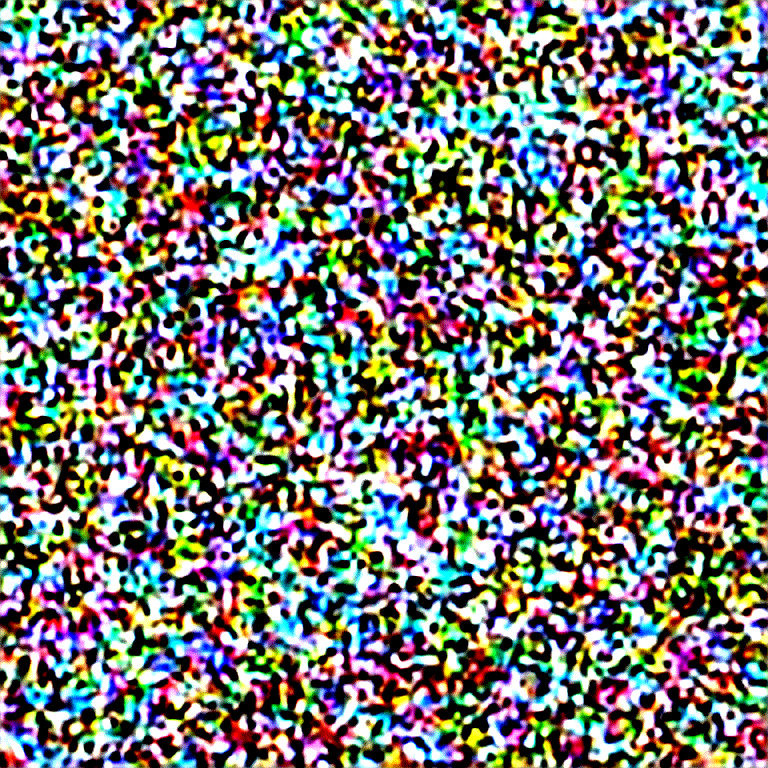

In [9]:
duration = 500  # @param{type: "integer"}
# @markdown  `duration`パラメタで生成するGIFのフレーム間隔(1/100秒)を指定します。
export_latent = False  # @param {type:"boolean"}
# @markdown  `export_latent`をONにすると、VAEのデコード前のテンソル（潜在空間表現）を疑似カラーとして出力します。
space = "latent" if export_latent else "pixel"
files = sorted(glob.glob(f"{CFG.prompt}-{CFG.seed_idx}/{space}/*.png"))
images = list(map(lambda file: Image.open(file), files))
# images[-1].save(f'{CFG.prompt}-{CFG.seed_idx}/final_{space}.png')
images[0].save(
    f"{CFG.prompt}-{CFG.seed_idx}/{space}.gif",
    save_all=True,
    append_images=images[1:],
    duration=duration,
    loop=0,
)
IPython.display.Image(f"{CFG.prompt}-{CFG.seed_idx}/pixel.gif", format="png")

## 🔍 出典 / Reference

オリジナルの Stable Diffusion モデルは以下の研究者や [Stability.ai](https://stability.ai/) の協力によって作成されました。
  
The original [Stable Diffusion](https://github.com/Stability-AI/stablediffusion) model was created in a collaboration with Robin Rombach, Andreas Blattmann, Dominik Lorenz, Patrick Esser, Björn Ommer and the [Stability.ai](https://stability.ai/) Team.

[High-Resolution Image Synthesis with Latent Diffusion Models](https://ommer-lab.com/research/latent-diffusion-models/)
[Robin Rombach](https://github.com/rromb)*, [Andreas Blattmann](https://github.com/ablattmann)*, [Dominik Lorenz](https://github.com/qp-qp), [Patrick Esser](https://github.com/pesser), [Björn Ommer](https://hci.iwr.uni-heidelberg.de/Staff/bommer)
[CVPR '22 Oral](https://openaccess.thecvf.com/content/CVPR2022/html/Rombach_High-Resolution_Image_Synthesis_With_Latent_Diffusion_Models_CVPR_2022_paper.html) | [GitHub](https://github.com/CompVis/latent-diffusion) | [arXiv](https://arxiv.org/abs/2112.10752) | [Project page](https://ommer-lab.com/research/latent-diffusion-models/)
